In [74]:
from ecell4 import *
from ecell4 import util
from ecell4.extra import ensemble
import math
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = GSLRandomNumberGenerator()

duration = 1000
L=1
Da=1#0.1
Db=0
D = Da+Db
koff = 0.02
N = 12
V = L**3
rm = 0.05
wv=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)

kon= 0.1/wv
kd= 4.0*math.pi*D*2*rm
tmol = (2*rm)**2 / 6/D

def create_model(D1,D2,koff,kon,rm): #sturock model
    with species_attributes():
        A | {'D': str(D1), 'radius':str(rm)}
        B | {'D': str(D2), 'radius':str(rm)}
    with reaction_rules():
        A + B > B | koff
        ~A > A | kon
    return get_model()

#w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),rm) 

print wv
keff = kon*wv**2 /N
ka = keff*kd/(kd-keff)
print keff,ka,kd

m = create_model(Da,Db,ka,kon,rm)
#util.run_simulation(t=duration,y0={'A': 0,'B':N},volume=V, model=m, solver=("spatiocyte",rm),species_list=["A"])
#obs=ensemble.ensemble_simulations(duration,n=10, model=m,y0={'B': 1}, solver=("spatiocyte",rm),volume=V,species_list=["A"])#,return_type='observer')#,nproc=3,method='multiprocessing')#,return_type="observer")



1.66311514935
0.0138592929113 0.0140138499084 1.25663706144


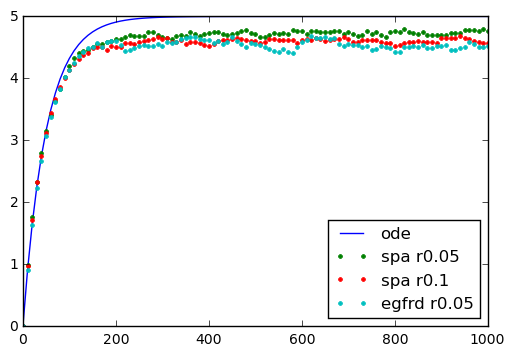

In [82]:
from ecell4 import *
from ecell4 import util
from ecell4.extra import ensemble
import math
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = GSLRandomNumberGenerator()

duration = 1000
L=1
Da=0.1
Db=0
D = Da+Db
koff = 0.02
N = 5
V = L**3
kon= 0.1/V
rm = 0.05
kd= 4.0*math.pi*D*2*rm

def create_model(D1,D2,koff,kon,rm): #sturock model
    with species_attributes():
        A | {'D': str(D1), 'radius':str(rm)}
        B | {'D': str(D2), 'radius':str(rm)}
    with reaction_rules():
        A + B > B | koff
        ~A > A | kon
    return get_model()
keff = kon*V**2 /N
m = create_model(Da,Db,keff,kon,rm)
obs=util.run_simulation(t=duration,y0={'B':1},volume=V, model=m, solver=("ode"),species_list=["A"],return_type='observer')
dode=np.array(obs.data()).T

dat1=np.loadtxt('/home/chew/wrk/ecellwork/data/sturrockmeanN5D01r005',delimiter=',',dtype='str')
dat2=np.loadtxt('/home/chew/wrk/ecellwork/data/sturrockmeanN5D01r01',delimiter=',',dtype='str')
dat3=np.loadtxt('/home/chew/wrk/ecellwork/data/sturrockmeanegN5D01r005',delimiter=',',dtype='str')
#dat4=np.loadtxt('/home/chew/wrk/spatiocyte/examples/sturrock/SpaN5D01r0.05',delimiter=',',skiprows=1)
plt.plot(dode[0],dode[1],label='ode')
plt.plot(dat1[:,0],dat1[:,1],'.',label='spa r0.05')
plt.plot(dat2[:,0],dat2[:,1],'.',label='spa r0.1')
plt.plot(dat3[:,0],dat3[:,1],'.',label='egfrd r0.05')
#plt.plot(dat4[:,0],dat4[:,1],'-',label='ec3 spa r0.05')
plt.legend(loc='best')

12.5663706144 0.125663706144 0.124419511033


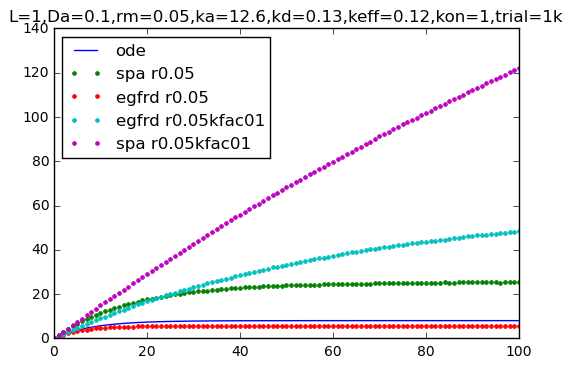

In [103]:
from ecell4 import *
from ecell4 import util
from ecell4.extra import ensemble
import math
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = GSLRandomNumberGenerator()

duration = 100
L=1
Da=0.1
Db=0
D = Da+Db
V = L**3
rm = 0.05
kd= 4.0*math.pi*D*2*rm
ka=100*kd
keff = ka*kd/(ka+kd)
kon = 1
print ka,kd,keff

def create_model(D1,D2,koff,kon,rm): #sturock model
    with species_attributes():
        A | {'D': str(D1), 'radius':str(rm)}
        B | {'D': str(D2), 'radius':str(rm)}
    with reaction_rules():
        A + B > B | koff
        ~A > A | kon
    return get_model()

m = create_model(Da,Db,keff,kon,rm)
obs=util.run_simulation(t=duration,y0={'B':1},volume=V, model=m, solver=("ode"),species_list=["A"],return_type='observer')
dode=np.array(obs.data()).T

dat1=np.loadtxt('/home/chew/wrk/ecellwork/data/sturrockmeanspaN5D01r005kfac10',delimiter=',',dtype='str')
dat2=np.loadtxt('/home/chew/wrk/ecellwork/data/sturrockmeanegN5D01r005kfac10',delimiter=',',dtype='str')
dat3=np.loadtxt('/home/chew/wrk/ecellwork/data/sturrockmeanspaN5D01r005kfac01',delimiter=',',dtype='str')
dat4=np.loadtxt('/home/chew/wrk/ecellwork/data/sturrockmeanegN5D01r005kfac01',delimiter=',',dtype='str')
#dat4=np.loadtxt('/home/chew/wrk/spatiocyte/examples/sturrock/SpaN5D01r0.05',delimiter=',',skiprows=1)
plt.plot(dode[0],dode[1],label='ode')
plt.plot(dat1[:,0],dat1[:,1],'.',label='spa r0.05')
plt.plot(dat2[:,0],dat2[:,1],'.',label='egfrd r0.05')
plt.plot(dat4[:,0],dat4[:,1],'.',label='egfrd r0.05kfac01')
plt.plot(dat3[:,0],dat3[:,1],'.',label='spa r0.05kfac01')
#plt.plot(dat4[:,0],dat4[:,1],'-',label='ec3 spa r0.05')
plt.title('L=1,Da=0.1,rm=0.05,ka=12.6,kd=0.13,keff=0.12,kon=1,trial=1k')
plt.legend(loc='best')
plt.savefig("from_microscopic_parameter.png")

In [89]:
dode[1][-10]

8.0372273617179815